In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# Import the Data set
train = pd.read_csv('UCI_HAR_dataset/train/train.csv')
test = pd.read_csv('UCI_HAR_dataset/test/test.csv')

# Merge the data into a single file as 'data'(later we will use train_test_split for splitting train and test set)
data = pd.concat([train, test])

# Success - Display the first record
display(data.head(n=5))

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
# Split the data into training and test set:
from sklearn.model_selection import train_test_split

raw_data = data  # Store the dataframe as raw_data
label = raw_data['Activity']  # Store trget feture as 'label'

raw_data = raw_data.drop(['Activity'], axis = 1)  # Drop the target feature (562 Columns)

X_train, X_test, y_train, y_test = train_test_split(raw_data, label, test_size = 0.3, random_state = 19)
print(X_train['subject'])

1165    10
19       2
4050    21
2149    18
6070    27
        ..
6452    28
1043     6
5032    23
1378     7
757      5
Name: subject, Length: 7209, dtype: int64


### Train data

In [4]:


y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',
                              6:'LAYING'})

# put all columns together
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.head()

C:\Users\Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1165,0.578400,0.009883,-0.130859,0.341924,-0.062921,-0.130535,0.304129,-0.066165,-0.134999,0.786436,...,-0.851049,-0.096350,0.962530,0.071969,-0.897489,0.040900,-0.031175,10,WALKING_DOWNSTAIRS,NaN
19,0.271166,-0.025973,-0.094923,-0.970124,-0.901878,-0.965300,-0.977387,-0.908967,-0.968392,-0.911152,...,-0.065276,0.156377,-0.154816,0.131187,-0.601416,0.371978,-0.010461,2,STANDING,NaN
4050,0.278156,-0.016448,-0.111201,-0.995898,-0.987628,-0.978110,-0.996464,-0.987058,-0.978564,-0.935334,...,-0.102965,-0.048406,0.278183,0.273302,-0.932754,0.111062,0.065788,21,SITTING,NaN
2149,0.233973,-0.009555,-0.115211,-0.334092,-0.232288,-0.211536,-0.379939,-0.216627,-0.216017,-0.140107,...,0.704842,0.723022,0.544920,0.405939,-0.662853,0.267313,0.181619,18,WALKING,NaN
6070,0.275467,-0.021767,-0.119545,-0.997403,-0.982331,-0.985988,-0.997743,-0.981691,-0.984539,-0.942724,...,-0.010225,0.159167,0.007841,0.272758,-0.817100,0.222979,0.038585,27,STANDING,NaN


In [5]:
train.shape

(7209, 564)

### Test data

In [6]:

y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',
                            6:'LAYING'})

# put all columns together
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.head()

C:\Users\Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1955,0.273935,-0.016023,-0.106849,-0.993865,-0.990422,-0.991090,-0.994627,-0.991434,-0.990548,-0.940770,...,-0.278928,0.064463,0.309665,0.237864,0.340430,-0.789157,-0.112264,11,LAYING,NaN
6097,0.279195,-0.015663,-0.101792,-0.992687,-0.988343,-0.982286,-0.992907,-0.989575,-0.982991,-0.936086,...,-0.362674,0.164835,-0.048361,0.040260,-0.531195,-0.110098,-0.236015,27,SITTING,NaN
5953,0.281790,-0.016376,-0.109538,-0.995507,-0.993753,-0.994045,-0.996174,-0.993031,-0.992942,-0.938722,...,0.101996,0.537641,-0.101098,-0.166053,0.651320,-0.330186,-0.681077,27,LAYING,NaN
1464,0.339960,-0.048642,-0.135529,-0.076412,0.067242,-0.465712,-0.151272,0.031526,-0.493239,0.444512,...,-0.469575,0.826685,0.936665,-0.347525,-0.850703,0.199345,0.039075,12,WALKING,NaN
4306,0.336648,0.025299,-0.084168,-0.100246,0.106797,-0.056118,-0.175973,0.109962,-0.025260,0.449072,...,-0.037829,-0.203716,0.935076,0.792541,-0.583293,0.343633,0.167967,21,WALKING,NaN


In [7]:
test.shape

(3090, 564)

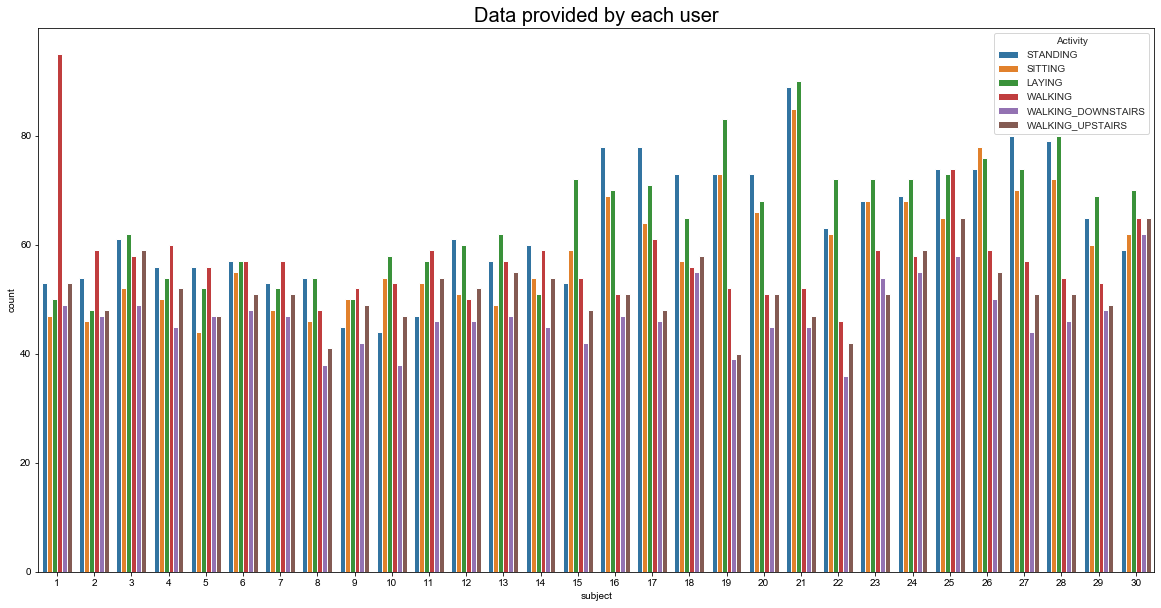

In [8]:
plt.figure(figsize=(20, 10))
plt.title('Data provided by each user', fontsize=20)

sns.set_style('whitegrid')
sns.countplot(hue='Activity', x='subject', data = data)
plt.show()

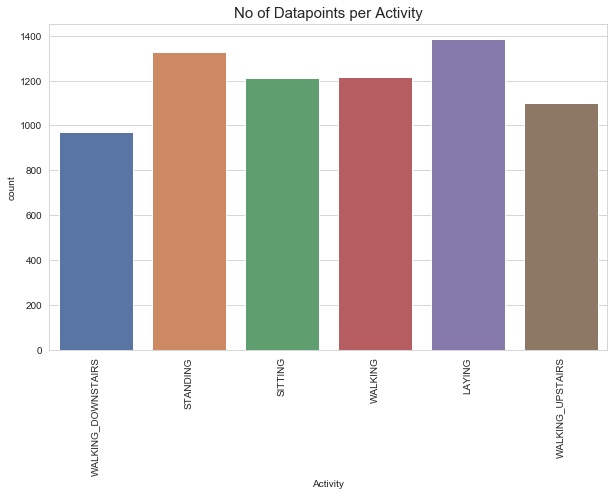

In [9]:
plt.figure(figsize=(10, 6))
plt.title('No of Datapoints per Activity', fontsize=15)
sns.set(font_scale=1.2)
sns.countplot(train.Activity)
plt.xticks(rotation=90)
plt.show()

## Exploratory Data Analysis

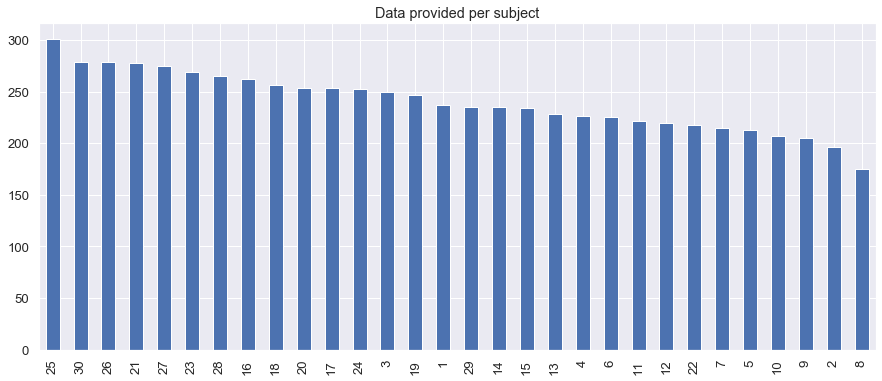

In [10]:
train['subject'].value_counts().plot(kind='bar',figsize=(15,6), title='Data provided per subject')

### Visualisation of all 561 features by applying t-sne on the data

Creating plot for this t-sne visualization..


C:\Users\Master\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


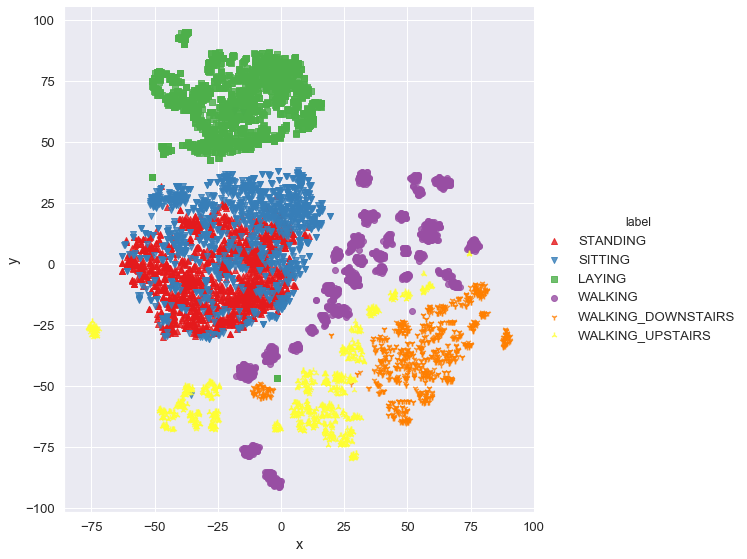

In [11]:
train = pd.read_csv('UCI_HAR_dataset/train/train.csv')
test = pd.read_csv('UCI_HAR_dataset/test/test.csv')

y_tsne = train['Activity']
X_tsne = train.drop(['subject', 'Activity'], axis=1)


tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(X_tsne)

# prepare the data for seaborn         
print('Creating plot for this t-sne visualization..')
df = pd.DataFrame({'x':tsne_transformed[:,0], 'y':tsne_transformed[:,1] ,'label':y_tsne})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
           palette="Set1",markers=['^','v','s','o', '1','2'])
# plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
# img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
# print('saving this plot as image in present working directory...')
# plt.savefig(img_name)
plt.show()